# 3 앙상블 학습

- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 이미지, 영상, 음성, 자연어 등 비정형 데이터 분류는 딥러닝 모델이 뛰어난 성적을 얻고 있지만, 대부분 정형 데이터 분류에는 앙상블 모델이 뛰어난 성능을 나타내고 있다.\
  앙상블 모델이 뛰어난 성능을 나타내고 있음

In [130]:
import pandas as pd 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [132]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [134]:
lr_clf = LogisticRegression(max_iter=3000)
knn_clf = KNeighborsClassifier(n_neighbors=7)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], # LR. KNN 은 이름을 지정한 것
                                     voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                              test_size=0.2, random_state=156)
                                     

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test , pred)))



Voting 분류기 정확도:0.9561


In [136]:
for classifier in [lr_clf, knn_clf]:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__ # 분류기의 이름 객체를 가져오는 것이다
    print('{0} 정확도 : {1:.4f}'.format(class_name,accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9474


In [137]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                              test_size=0.2, random_state=156)

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
#accuracy_score 함수는 실제 레이블(y_test)과 예측 결과(pred)를 비교하여 모델의 정확도를 계산합니다. 정확도는 전체 샘플 중에서 올바르게 분류된 샘플의 비율임
print('랜덤 포레스트 정확도:{0:.4f}'. format(accuracy))

랜덤 포레스트 정확도:0.9561


In [139]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf' :[8, 12 , 18],
    'min_samples_split' : [8, 16, 20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'. format(grid_cv.best_score_))
      
# n jobs는 나무니까 다 돌리면 시간이 오래 걸림, 학습을 할때 너가 사용할 컴퓨터 cpu 옵션은 -1 하면 모든 가용자원을 다 사용해라

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9451


In [141]:
rf_clf1 = RandomForestClassifier(n_estimators=300,
                                 max_depth=6,
                                 min_samples_leaf=8,
                                 min_samples_split=8,
                                 random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('최고 예측 정확도:{0:.4f}'.format(accuracy_score(y_test , pred)))

최고 예측 정확도:0.9474


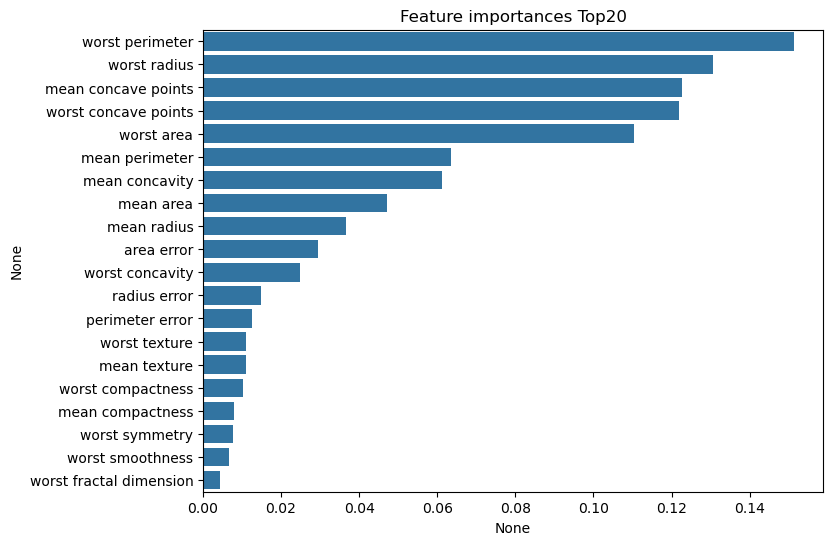

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_value = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_value,index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# 5. GBM(Gradient Boosting Machine

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
import time 
import pandas as pd

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                              test_size=0.2, random_state=156)

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 :{0:.1f}'.format(time.time() - start_time))      

# 이 명령이 시작됐을 때의 시간값


GBM 정확도 : 0.9561
GBM 수행 시간 :0.3


In [157]:
# GBM 하이퍼 파라미터 소개

In [164]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 500],
    'learning_rate':[0.05, 0.1]    
}
grid_cv = GridSearchCV(gb_clf, param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'. format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도:0.9517


In [165]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params','mean_test_score', 'rank_test_score',
'split0_test_score','split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'learning_rate': 0.05, 'n_estimators': 100}",0.927525,4,0.903509,0.951542
1,"{'learning_rate': 0.05, 'n_estimators': 500}",0.949474,2,0.938596,0.960352
2,"{'learning_rate': 0.1, 'n_estimators': 100}",0.938500,3,0.921053,0.955947
3,"{'learning_rate': 0.1, 'n_estimators': 500}",0.951667,1,0.942982,0.960352


# 파이썬 Native XGboost적용

In [234]:
import xgboost

print(xgboost.__version__)

2.0.3


In [236]:
!conda install -c anaconda py-xgboost -y

Channels:
 - anaconda
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [237]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [238]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [279]:
#cancer_df 에서 feature 용 dataframe과 label용 series객체 추출
# 맨 마지막 컬림이 label임 feature용 dataframe은 cancer_df은 
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [281]:
# 전체 데이터 중 80
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                              test_size=0.2, random_state=156)
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [283]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.1531,0.3583,0.58300,0.18270,0.3216,0.10100
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.20990,0.10250,0.3038,0.12520
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858


In [285]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [287]:
# dtrain이 적합한 모델로 바꿔주는 것

dtrain = xgb.DMatrix(data=X_train, label = y_train,feature_names = list(dataset.feature_names))
dtest = xgb.DMatrix(data=X_test, label = y_test,feature_names = list(dataset.feature_names))


In [289]:
params = {'max_depth' : 3,
         'eta':0.1,
         'objective' : 'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings' : 100 # 손실이 연속적으로 100 번늘어난다고 하면 400까지 안해도 강제 종료 해라 이뜻
        }
num_rounds=400

In [291]:

wlist = [(dtrain,'train'),(dtest, 'eval')]

xgb_model = xgb.train(params = params,
                      dtrain=dtrain,
                      num_boost_round=num_rounds ,
                      evals=wlist)

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

In [295]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:' ,preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.944 0.005 0.881 0.156 0.994 1.    1.    1.    0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [309]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve

def get_clf_eval(y_test=None , pred = None): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred)
    print ('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0: .4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
          F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1, roc_auc))


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

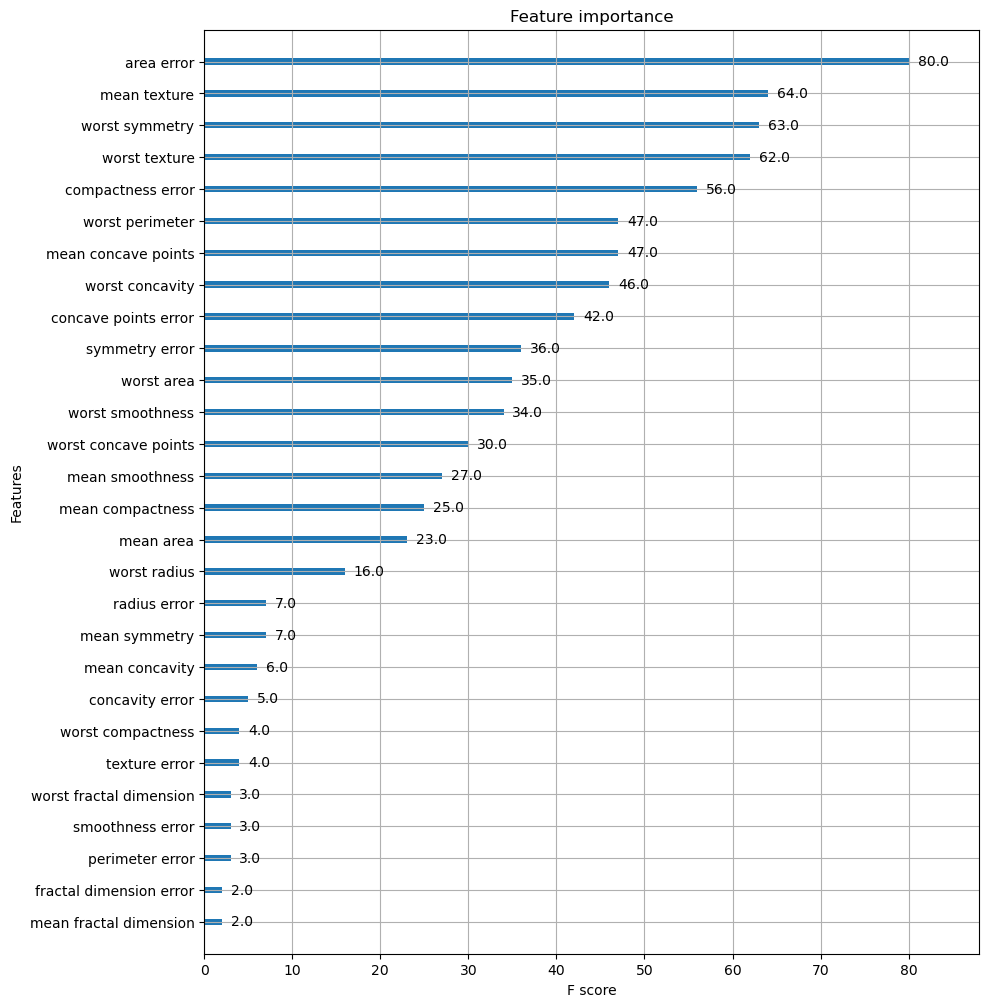

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline

fig ,ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model,ax=ax)

In [313]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators =400, learning_rate = 0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals,
                eval_metric='logloss', verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [318]:
get_clf_eval(y_test , w_preds)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 :  0.9649, 정밀도 : 0.9620, 재현율 : 0.9870,          F1:0.9744, AUC:0.9530


# 7 Light GBM

- XGBoost 알고리즘도 수행 속도가 줄었지만 여전히 오래걸림 이를 해결하기 위해 등장

In [336]:
import lightgbm
import pandas as pd

print(lightgbm.__version__)

3.3.5


In [6]:
!conda install -c conda-forge lightgbm==3.3.5 -y

Channels:
 - conda-forge
 - defaults
 - anaconda
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [33]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                              test_size=0.2, random_state=156)
#
lbgm_wrapper = LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lbgm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss',
                 eval_set = evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

C:\Users\705-8\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\705-8\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


NameError: name 'lgbm_wrapper' is not defined

In [43]:
get_clf_eval(y_test, perds)

NameError: name 'get_clf_eval' is not defined

NameError: name 'lgbm_wrapper' is not defined

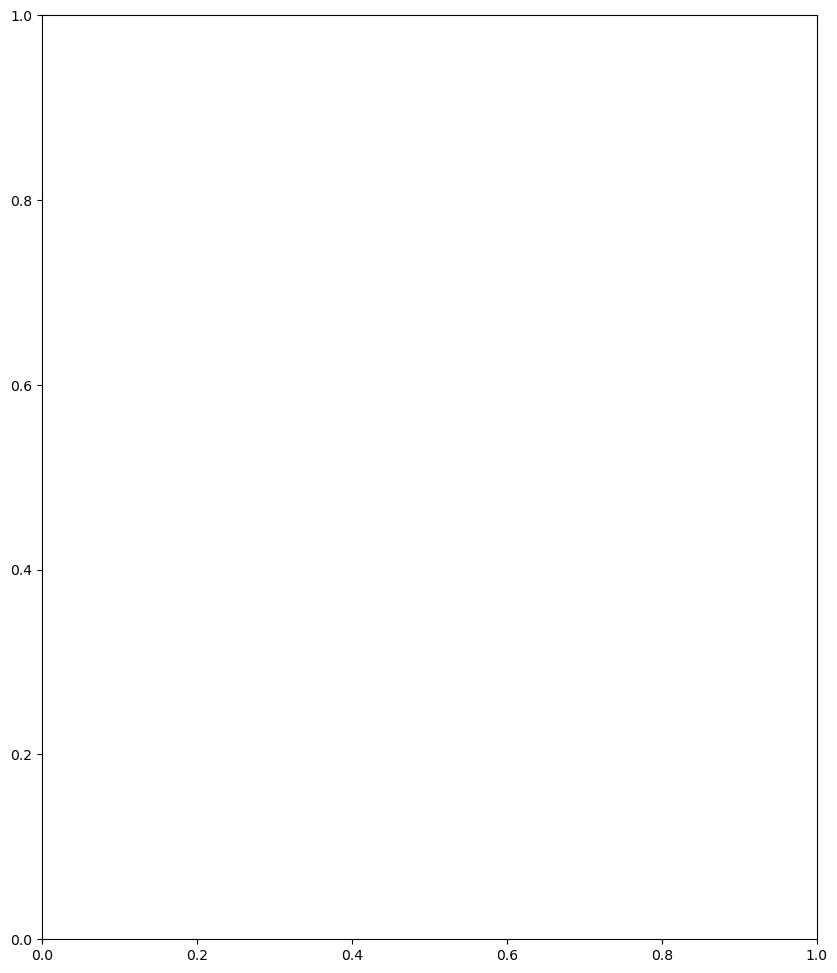

In [45]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,
                ax=ax)

In [153]:
import os

os.environ['KAGGLE_USERNAME'] = 'hojunnn'
os.environ['KAGGLE_KEY'] = 'd4271b12660538c66718e87a2c67b22b'

In [155]:
!pip install kaggle

In [156]:
!kaggle competitions download -c santander-customer-satisfaction

santander-customer-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [157]:

!tar -zxvf santander-customer-satisfaction.zip

x sample_submission.csv
x test.csv
x train.csv


In [158]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1499-BAB9

 C:\Users\705-8\2-0 파이썬 머신러닝 완벽 가이드 디렉터리

2024-07-31  오후 04:03    <DIR>          .
2024-07-31  오후 04:03    <DIR>          ..
2024-07-31  오전 10:33    <DIR>          .ipynb_checkpoints
2024-07-25  오후 05:37            22,835 1장 파이썬 기반의 머신러닝 생태계 이해.ipynb
2024-07-29  오후 02:16           187,932 2장 사이킷런으로 시작하는 머신러닝.ipynb
2024-07-31  오후 02:29           213,483 3장 평가.ipynb
2024-07-31  오후 04:01           352,048 4장 분류 part 2.ipynb
2024-07-31  오후 02:44           118,492 4장 분류 part1.ipynb
2024-07-31  오전 10:32            93,942 KNN, 서포트 벡터 머신.ipynb
2019-12-11  오전 03:52           626,900 sample_submission.csv
2019-12-11  오전 03:52         8,646,304 santander-customer-satisfaction.zip
2019-12-11  오후 10:01       262,272,082 santander-customer-transaction-prediction.zip
2019-12-11  오전 03:52        59,054,007 test.csv
2019-12-11  오전 03:52        59,362,806 train.csv
2024-07-30  오후 03:32             2,320 tree.dot
2024-07-31  오전 09:30             9,668 Untitle

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train.csv.",encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [249]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [251]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [253]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [255]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


C:\Users\705-8\AppData\Local\Temp\ipykernel_5292\1183085225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_df['var3'].replace(-999999, 2, inplace=True)


In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                              test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [259]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=0)

In [261]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_esrimators=500, lerning_rate=0.05, random_state=156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))
                                                                        
                                                                                

C:\Users\705-8\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\705-8\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.84325	validation_1-auc:0.81272
[2]	validation_0-auc:0.85238	validation_1-auc:0.82054
[3]	validation_0-auc:0.85885	validation_1-auc:0.82448
[4]	validation_0-auc:0.86337	validation_1-auc:0.82670
[5]	validation_0-auc:0.86731	validation_1-auc:0.82955


C:\Users\705-8\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:28:37] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "lerning_rate", "n_esrimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation_0-auc:0.87131	validation_1-auc:0.83015
[7]	validation_0-auc:0.87557	validation_1-auc:0.82932
[8]	validation_0-auc:0.87886	validation_1-auc:0.82959
[9]	validation_0-auc:0.88170	validation_1-auc:0.82988
[10]	validation_0-auc:0.88332	validation_1-auc:0.83028
[11]	validation_0-auc:0.88501	validation_1-auc:0.83066
[12]	validation_0-auc:0.88745	validation_1-auc:0.83195
[13]	validation_0-auc:0.88881	validation_1-auc:0.83245
[14]	validation_0-auc:0.89095	validation_1-auc:0.83252
[15]	validation_0-auc:0.89251	validation_1-auc:0.83269
[16]	validation_0-auc:0.89494	validation_1-auc:0.83228
[17]	validation_0-auc:0.89554	validation_1-auc:0.83205
[18]	validation_0-auc:0.89570	validation_1-auc:0.83232
[19]	validation_0-auc:0.89652	validation_1-auc:0.83242
[20]	validation_0-auc:0.89793	validation_1-auc:0.83240
[21]	validation_0-auc:0.89854	validation_1-auc:0.83235
[22]	validation_0-auc:0.90046	validation_1-auc:0.83179
[23]	validation_0-auc:0.90066	validation_1-auc:0.83205
[24]	validatio

In [277]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth', 5, 15,1),
                     'min_child_weight': hp.quniform('min_child_weight', 1,6,1),
                     'colsample_bytree': hp.uniform('colsample_bytree',0.5,0.95),
                     'learning_rate': hp.uniform('learning_rate',0.01, 0.2)}

In [279]:
# 목적 함수, 3Fold 교차 검증을 이용

In [281]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=500, max_depth = int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])

#3개 k-fild 방식으로 평가된 oc_auc 지표를 담는 list
    roc_auc_list =[]

    kf = KFold(n_splits=3)

# X_train을 다시 학습과 검증용 데이터로 분리

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
# early_stopping_rounds 은 30 회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
    xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,-1])
    roc_auc_list.appened(score)

    return -1*np.mean(roc_auc_list)


In [283]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다
            trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\705-8\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\705-8\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.77283	validation_1-auc:0.75372                                                                  
[1]	validation_0-auc:0.77933	validation_1-auc:0.75940                                                                  
[2]	validation_0-auc:0.78395	validation_1-auc:0.76293                                                                  
[3]	validation_0-auc:0.83011	validation_1-auc:0.79852                                                                  
[4]	validation_0-auc:0.82457	validation_1-auc:0.79414                                                                  
[5]	validation_0-auc:0.83791	validation_1-auc:0.80653                                                                  
[6]	validation_0-auc:0.84532	validation_1-auc:0.81308                                                                  
[7]	validation_0-auc:0.84890	validation_1-auc:0.81579                                                                  
[8]	validation_0-auc:0.84863	validation_

job exception: 'list' object has no attribute 'appened'



  0%|                                                                           | 0/50 [00:04<?, ?trial/s, best loss=?]


AttributeError: 'list' object has no attribute 'appened'

In [225]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)] # eval_set은 모델 학습 중에 성능을 모니터링할 평가 데이터를 지정할 수 있는 매개변수
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\705-8\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

In [285]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth':hp.quniform('max_depth', 100, 160, 1),
                     'min_child_weight':hp.quniform('min_child_weight',60,100,1),
                     'subsample': hp.quniform('subsample',0.7,1),
                     'learning_rate':hp.quniform('learning_rate',0.01,0.2)     
                    }

In [287]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_weight=int(search_space['min_child_weight']),
                              subsample=int(search_space['subsample']),
                              learning_rate=search_space['learning_rate'])

    roc_auc_list = []

    kf = KFold(n_splits=3)

# X_train을 다시 학습과 검증용 데이터로 분리

    for tr_index, val_index in kf.split(X_train):
        
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
# early_stopping_rounds 은 30 회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
    lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,-1])
    roc_auc_list.appened(score)

    return -1*np.mean(roc_auc_list)

    
    
                              
    

In [289]:
from hyperpot import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다
            trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

ModuleNotFoundError: No module named 'hyperpot'

In [291]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                              max_depth=int(best['max_depth']),
                              min_child_weight=int(best['min_child_weight']),
                              subsample=int(best['subsample'],5),
                              learning_rate=(best['learning_rate'],5)
                         )

                          
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,-1])
print('ROC AUC : {0:,4f}'.format(lgbm_roc_score))

NameError: name 'best' is not defined